In [1]:
import shap

In [78]:
import lightgbm

ModuleNotFoundError: No module named 'lightgbm'

In [40]:
import pandas as pd
import anndata as ad
import numpy as np
from collections import defaultdict
from tqdm import tqdm

In [41]:
import pickle
with open("optimized_ad_shap.pkl", "rb") as f:
    shap_data = pickle.load(f)

In [42]:
shap_data[0][2]['y_pred_rep']

array([[0.9785403 , 0.02145971],
       [0.9878763 , 0.01212364],
       [0.8231622 , 0.17683785],
       ...,
       [0.809619  , 0.19038095],
       [0.63576627, 0.36423367],
       [0.6902167 , 0.30978328]], dtype=float32)

In [69]:
K = pd.DataFrame(cdata, columns=cfeature_names)

In [75]:
[col for col in K.columns if 'bn_str_ca_right' in col]

['id_invicrot1_vol_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_vol_bn_str_ca_rightcit168',
 'id_invicrot1_area_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_thk_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_thk_bn_str_ca_rightcit168',
 'id_invicrot1_area_bn_str_ca_rightcit168']

<AxesSubplot:xlabel='id_invicrot1_vol_bn_str_ca_rightdeep_cit168', ylabel='rep_y_probas1'>

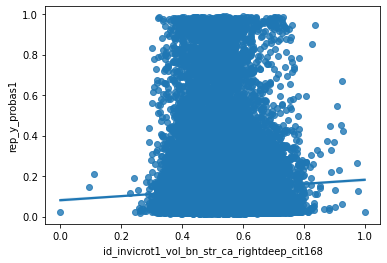

In [77]:
# sns.regplot(x=K['id_invicrot1_vol_right_parahippocampalmtl'], y=ensemble_prediction['rep_y_probas1'])
sns.regplot(x=K['id_invicrot1_vol_bn_str_ca_rightdeep_cit168'], y=ensemble_prediction['rep_y_probas1'])

In [ ]:
ensemble_prediction['rep_y_probas1']


In [61]:
sum_shap_values.shape

(52708, 791)

<AxesSubplot:ylabel='rep_y_probas1'>

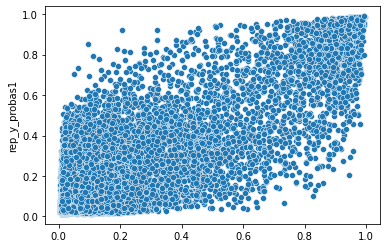

In [63]:
import seaborn as sns
sns.scatterplot(x=shap_data[0][2]['y_pred_rep'][:, 1], y=ensemble_prediction['rep_y_probas1'])

In [65]:
shap_data[0][2]['y_pred_rep'][:, 1].shape, ensemble_prediction['rep_y_probas1'].shape

((52708,), (52708,))

<AxesSubplot:>

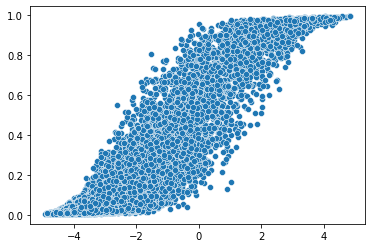

In [43]:
import seaborn as sns
sns.scatterplot(x=sum_shap_values.sum(axis=1), y=shap_data[0][2]['y_pred_rep'][:, 1])

In [44]:
sum_shap_values.sum(axis=1)

array([-3.4462538 , -3.6471415 , -2.5245175 , ..., -2.4953876 ,
       -1.3729494 , -0.49334255], dtype=float32)

In [45]:
replication_ad_imaging.var.index[replication_ad_imaging.var.index.str.contains('cerebellar_vermal_lobules')]

Index(['id_invicrot1_area_cerebellar_vermal_lobules_vi_viidktregions',
       'id_invicrot1_thk_cerebellar_vermal_lobules_i_vdktregions',
       'id_invicrot1_thk_cerebellar_vermal_lobules_vi_viidktregions',
       'id_invicrot1_vol_cerebellar_vermal_lobules_viii_xdktregions',
       'id_invicrot1_thk_cerebellar_vermal_lobules_viii_xdktregions',
       'id_invicrot1_area_cerebellar_vermal_lobules_i_vdktregions',
       'id_invicrot1_area_cerebellar_vermal_lobules_viii_xdktregions',
       'id_invicrot1_vol_cerebellar_vermal_lobules_vi_viidktregions',
       'id_invicrot1_vol_cerebellar_vermal_lobules_i_vdktregions'],
      dtype='object')

In [46]:
cols = 'id_invicrot1_vol_cerebellar_vermal_lobules_i_vdktregions'

In [47]:
selected_features_index = []
for i in range(len(replication_ad_imaging.var.index)):
    if replication_ad_imaging.var.index[i] in ['id_invicrot1_vol_cerebellar_vermal_lobules_i_vdktregions']:
        pass
    else:
        selected_features_index.append(i)
        
selected_features_index = np.array(selected_features_index)

In [48]:
# shap_data[1]

In [49]:
sum_shap_values = shap_data[0][0]['shap_values_rep'][:, 1, :] + shap_data[1][0]['shap_values_rep'][:, 1, :] + shap_data[2][0]['shap_values_rep'][:, 1, :]
sum_shap_values = sum_shap_values / 3
replication_ad_imaging = ad.read("ml_generated_data/23_03_30/predictiveModel/replication_ad_imaging.h5ad")

In [50]:
# shap_data[0][1]

In [51]:
cshap_values = sum_shap_values[:, 1:][:, selected_features_index]# samples x features 
cbase_values = sum_shap_values[:, 0] # samples x 1 
cfeature_names = shap_data[0][1][selected_features_index]
cdata = np.array(replication_ad_imaging.X[:, selected_features_index])
shap_obj = shap.Explanation(cshap_values, base_values=cbase_values, data=cdata, display_data=None, instance_names=None, feature_names=cfeature_names)

In [57]:
# ensemble_prediction = pd.read_csv("/Users/dadua2/projects_data/project_MLPhenotypesMRIGWAS/ml_generated_data/23_03_30/training/results_data/predictiveAnalysis/classification_detailed_metrics/phenotype_data/replication_ensemble_ad_imaging_probability_scores.csv")

ensemble_prediction = pd.read_csv("training/23_03_30/results_data/predictiveAnalysis/classification_detailed_metrics/phenotype_data/replication_ensemble_ad_imaging_probability_scores.csv")


In [59]:
ensemble_prediction['rep_y_probas1']

0        0.096813
1        0.029808
2        0.402941
3        0.054335
4        0.037455
           ...   
52703    0.275542
52704    0.063751
52705    0.094007
52706    0.516709
52707    0.446844
Name: rep_y_probas1, Length: 52708, dtype: float64

In [55]:
replication_ad_imaging

AnnData object with n_obs × n_vars = 52708 × 790
    obs: 'patid', 'age', 'diagnosis', 'mmse', 'mds_updrspartiii', 'moca', 'study', 'id_invicrot1_apoe4', 'gender', 'id_invicrot1_resnetgrade', 'id_updrs3_np3hmovl', 'id_invicrot1_adas11_bl', 'id_updrs3_np3rign', 'id_invicrot1_pteducat', 'id_updrs4_np4flcti', 'id_invicrot1_fldstreng', 'id_family_history_matau', 'id_invicrot1_movements_interefered_with_ratings_updr3on_cat', 'id_updrs1pq_np1pain', 'id_updrs4_np4wdysk', 'id_updrs3_np3lgagr', 'id_updrs3_np3rigll', 'id_updrs3_nhy', 'id_invicrot1_icv_bl', 'id_csf_abeta_42_abeta 1_42', 'id_invicrot1_most_recent_pd_med_dose_date_time_updrs3_cat', 'id_updrs1pq_np1cnst', 'id_updrs3_np3frzgt', 'id_invicrot1_most_recent_pd_med_dose_date_time_updr3of_cat', 'id_updrs2pq_np2salv', 'id_updrs2pq_np2frez', 'id_updrs1_np1dprs', 'id_invicrot1_movements_interefered_with_ratings_updr3of_cat', 'id_updrs3_np3ftapr', 'id_invicrot1_mri_resting_state', 'id_updrs2pq_np2eat', 'id_invicrot1_movements_interefered_with_

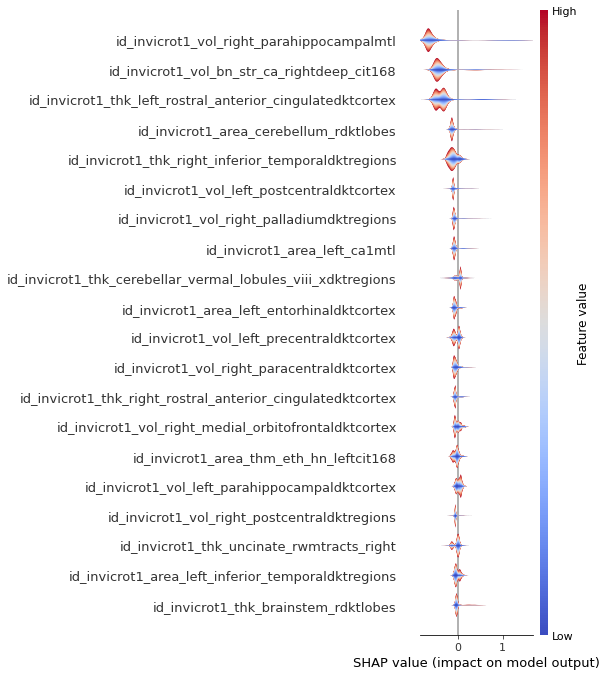

In [53]:
shap.summary_plot(shap_obj, plot_type="layered_violin", color='coolwarm', max_display=20)


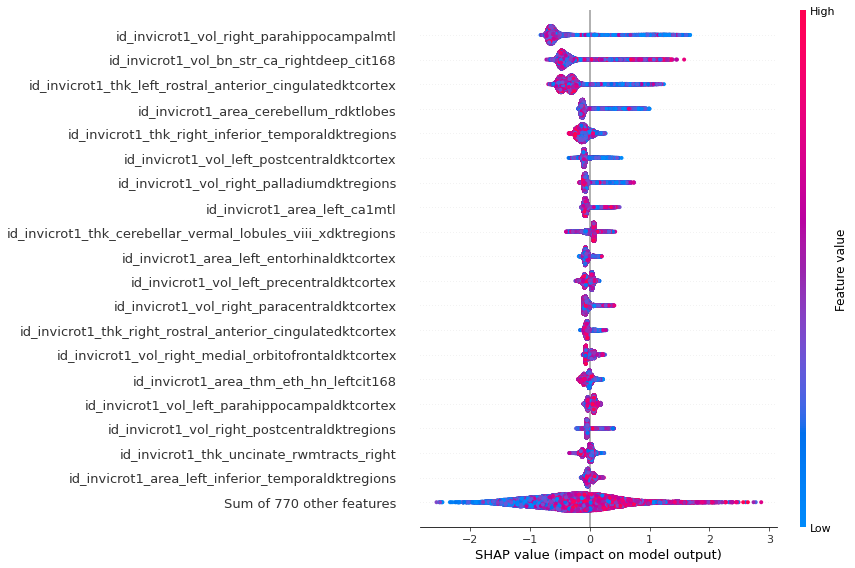

In [54]:
shap.plots.beeswarm(shap_obj, max_display=20)

In [208]:
sum_shap_values = np.concatenate([shap_data[0][0]['shap_values_test'][:, 1, :], shap_data[1][0]['shap_values_test'][:, 1, :], shap_data[2][0]['shap_values_test'][:, 1, :]], axis=0)
ad_imaging = ad.read("ml_generated_data/23_03_30/predictiveModel/ad_imaging.h5ad")

In [209]:
L = ad_imaging.obsm['train_val_test_split']
P = []
for fold in ['fold1', 'fold2', 'fold3']:
    T = L[L['subject_id-DIAGNOSIS-StratifiedGroupKFold_GroupShuffleSplit_42_42']==fold]
    P.append(np.array(ad_imaging[T.index].X))

P = np.concatenate(P)

In [210]:
cshap_values = sum_shap_values[:, 1:]# samples x features 
cbase_values = sum_shap_values[:, 0] # samples x 1 
cfeature_names = shap_data[0][1]
cdata = np.array(P)

In [211]:
shap_obj = shap.Explanation(cshap_values, base_values=cbase_values, data=cdata, display_data=None, instance_names=None, feature_names=cfeature_names)

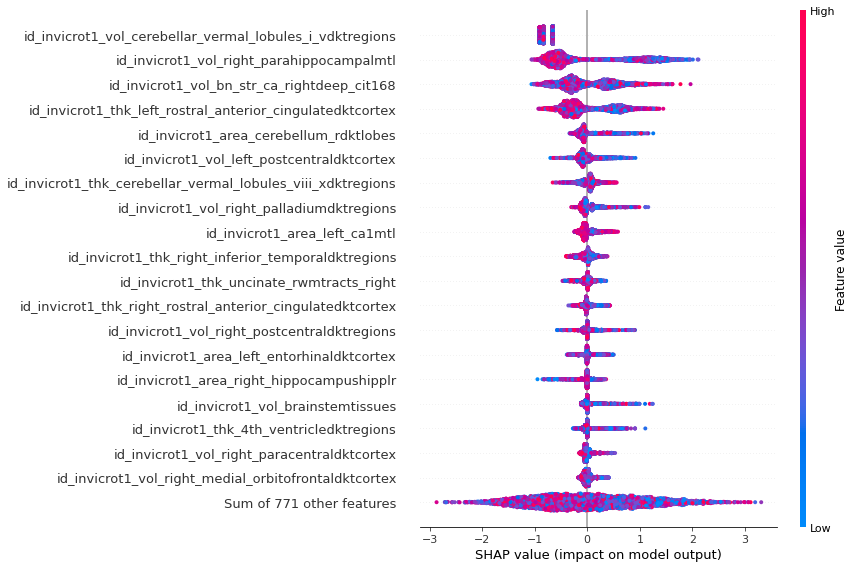

In [212]:
shap.plots.beeswarm(shap_obj, max_display=20)

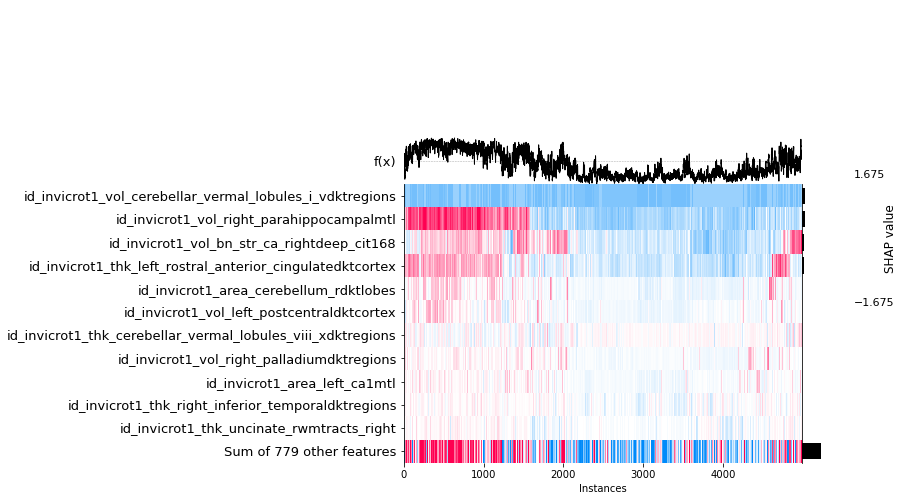

In [177]:
shap.plots.heatmap(shap_obj, max_display=12)


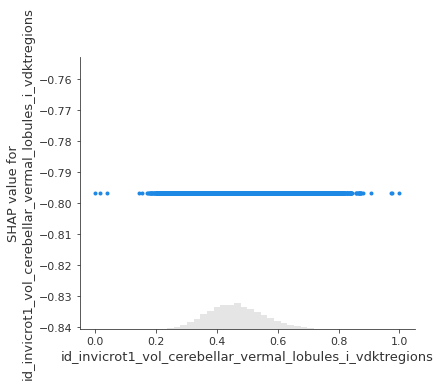

In [28]:
shap.plots.scatter(shap_obj[:, "id_invicrot1_vol_cerebellar_vermal_lobules_i_vdktregions"])


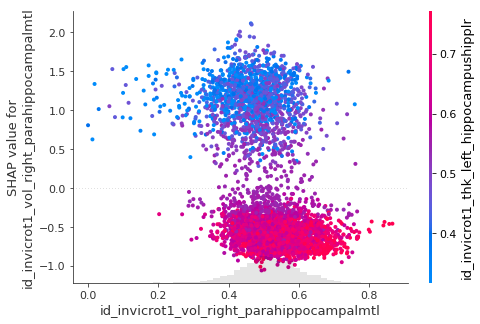

In [214]:
shap.plots.scatter(shap_obj[:, "id_invicrot1_vol_right_parahippocampalmtl"], color=shap_obj)


In [204]:
[col for col in cfeature_names if 'str_ca' in col]

['id_invicrot1_vol_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_vol_bn_str_ca_leftdeep_cit168',
 'id_invicrot1_area_bn_str_ca_leftcit168',
 'id_invicrot1_vol_bn_str_ca_rightcit168',
 'id_invicrot1_thk_bn_str_ca_leftcit168',
 'id_invicrot1_area_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_area_bn_str_ca_leftdeep_cit168',
 'id_invicrot1_thk_bn_str_ca_rightdeep_cit168',
 'id_invicrot1_thk_bn_str_ca_rightcit168',
 'id_invicrot1_vol_bn_str_ca_leftcit168',
 'id_invicrot1_area_bn_str_ca_rightcit168',
 'id_invicrot1_thk_bn_str_ca_leftdeep_cit168']

In [ ]:
clustering = shap.utils.hclust(cdata, y) # by default this trains (X.shape[1] choose 2) 2-feature XGBoost models
shap.plots.bar(shap_values, clustering=clustering)

In [159]:
y.shape

(32561,)

In [157]:
X

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,39.0,7,13.0,4,1,0,4,1,2174.0,0.0,40.0,39
1,50.0,6,13.0,2,4,4,4,1,0.0,0.0,13.0,39
2,38.0,4,9.0,0,6,0,4,1,0.0,0.0,40.0,39
3,53.0,4,7.0,2,6,4,2,1,0.0,0.0,40.0,39
4,28.0,4,13.0,2,10,5,2,0,0.0,0.0,40.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,4,12.0,2,13,5,4,0,0.0,0.0,38.0,39
32557,40.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
32558,58.0,4,9.0,6,1,1,4,0,0.0,0.0,40.0,39
32559,22.0,4,9.0,4,1,3,4,1,0.0,0.0,20.0,39


In [132]:
feature_dict = defaultdict(list)
for feature in shap_data[0][1]:
    feature_dict['_'.join(feature.split('_')[3:])].append(feature)

In [137]:
temp1 = pd.DataFrame(sum_shap_values[:, 1:], columns=shap_data[0][1]).abs()
replication_ad_imaging = ad.read("ml_generated_data/23_03_30/predictiveModel/replication_ad_imaging.h5ad")
temp2 = pd.DataFrame(replication_ad_imaging.X, columns=shap_data[0][1]).abs()

In [ ]:
pd.melt(df, id_vars=['A'], value_vars=['B'])

In [138]:
# temp2

In [139]:
# temp1

In [140]:
reduced_shap = {}
reduced_data = {}

for feat in tqdm(feature_dict):
    reduced_shap[feat] = list(temp1.agg(lambda x: x.mean(), axis=1))
    reduced_data[feat] = list(temp2.agg(lambda x: x.mean(), axis=1))
    
reduced_shap = pd.DataFrame(reduced_shap)
reduced_data = pd.DataFrame(reduced_data)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 260/260 [06:28<00:00,  1.50s/it]


In [141]:
cshap_values = reduced_shap.values # samples x features 
cbase_values = sum_shap_values[:, 0] # samples x 1 
cfeature_names = list(feature_dict)
cdata = reduced_data.values

In [148]:
shap_obj = shap.Explanation(cshap_values, base_values=cbase_values, data=cdata, display_data=None, instance_names=None, feature_names=cfeature_names)

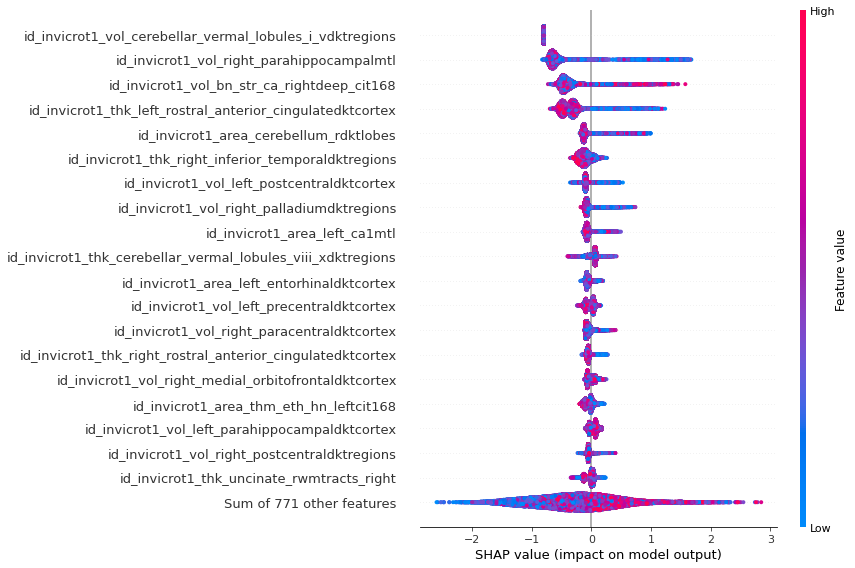

In [149]:
shap.plots.beeswarm(shap_obj, max_display=20)

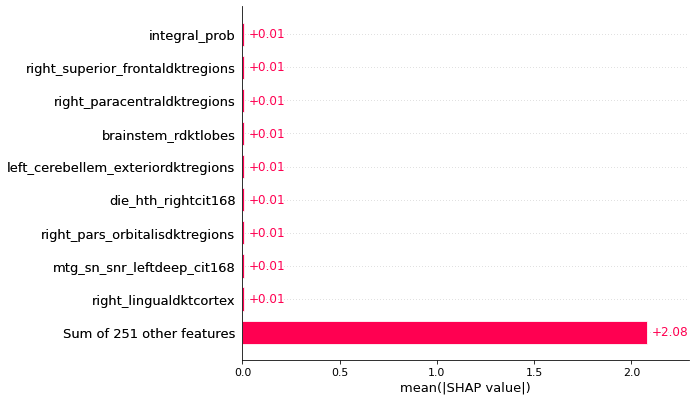

In [146]:
shap.plots.bar(shap_obj)


In [71]:
cshap_values = sum_shap_values[:, 1:]# samples x features 
cbase_values = sum_shap_values[:, 0] # samples x 1 
cfeature_names = shap_data[0][1]
cdata = np.array(replication_ad_imaging.X)

In [72]:
shap_obj = shap.Explanation(cshap_values, base_values=cbase_values, data=cdata, display_data=None, instance_names=None, feature_names=cfeature_names)

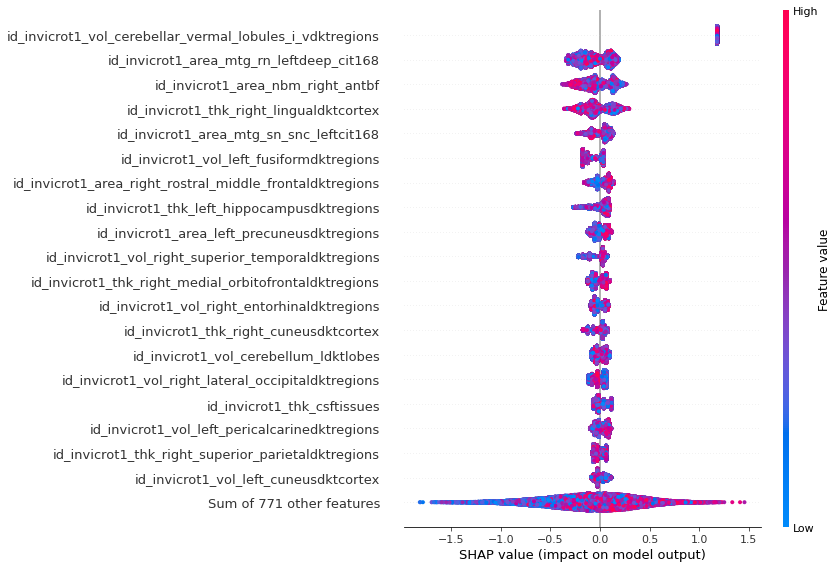

In [73]:
shap.plots.beeswarm(shap_obj, max_display=20)

In [26]:
cshap_values = shap_values.values # samples x features 
cbase_values = shap_values.base_values # samples x 1 
cdata = shap_values.data

In [30]:
shap_obj = shap.Explanation(cshap_values, base_values=cbase_values, data=None, display_data=None, instance_names=None, feature_names=X.columns)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


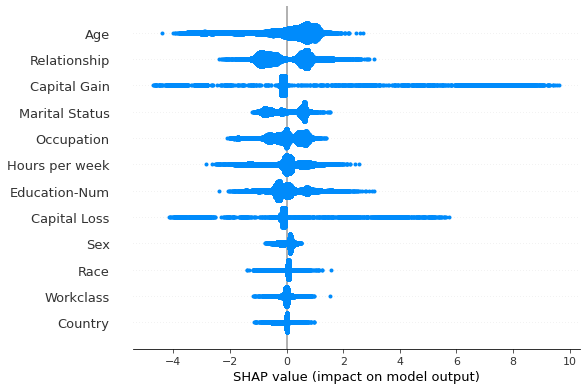

In [31]:
shap.plots.beeswarm(shap_obj, max_display=20)

In [ ]:
 t1 = dfl.copy()
            shap_values_train = explainer_train.shap_values(t1)
            # t1.columns = t1.columns.map(lambda x: feature_mapping.get(x, x).split(' (')[0])
            t1 = t2.copy()  # ndfl.copy().fillna('Not available')
            t1.columns = t1.columns.map(lambda x: feature_mapping.get(x, x).split(' (')[0])
            shap.force_plot(exval, shap_values_train, t1.round(2), show=False, matplotlib=True, link='logit', contribution_threshold=0.05)
            st.pyplot()
            plt.savefig("/app/mar4_force_plot.pdf", bbox_inches='tight')
            plt.savefig("/app/mar4_force_plot.eps", bbox_inches='tight')

            # _ = shap.force_plot(exval, shap_values_train, t1, matplotlib=True, show=False, link='logit')
            # st.pyplot(fig)
            # fig.savefig('/app/force_plot_new_shap_values_whatif.pdf', bbox_inches='tight')
            # fig.savefig('/app/force_plot_new_shap_values_whatif.eps', bbox_inches='tight')
            fig, ax = plt.subplots()
            t2.columns = t2.columns.map(lambda x: feature_mapping.get(x, x))
            # ndfl.columns = ndfl.columns.map(lambda x: feature_mapping.get(x, x))
            _ = shap.decision_plot(exval, shap_values_train, t2.round(2), link='logit', feature_order=r.feature_idx, return_objects=True, new_base_value=0, highlight=0)
            fig.savefig('/app/mar4_decisionplot.pdf', bbox_inches='tight')
            fig.savefig('/app/mar4_decisionplot.eps', bbox_inches='tight')
            st.pyplot(fig)

In [25]:
# X

In [22]:
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

# compute SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

 99%|===================| 32102/32561 [00:51<00:00]        

In [23]:
shap_values

.values =
array([[ 0.62066666, -0.43401289,  0.40111691, ..., -0.11033077,
        -0.09677086,  0.01754525],
       [ 1.13418912, -0.31901527,  0.59456016, ..., -0.18700681,
        -1.40943685,  0.01184286],
       [ 0.34393261, -0.00987605, -0.36651412, ..., -0.12711806,
         0.02807141, -0.01081819],
       ...,
       [ 1.23991321, -0.01095367, -0.26346211, ..., -0.13327572,
        -0.03201351,  0.03547605],
       [-1.89771603, -0.05581235, -0.34632427, ..., -0.17873634,
        -1.41615893, -0.01343117],
       [ 1.00243925,  0.14680661, -0.14676143, ..., -0.07620457,
         0.26474981,  0.01688919]])

.base_values =
array([-2.68469185, -2.68469185, -2.68469185, ..., -2.68469185,
       -2.68469185, -2.68469185])

.data =
array([[39.,  7., 13., ...,  0., 40., 39.],
       [50.,  6., 13., ...,  0., 13., 39.],
       [38.,  4.,  9., ...,  0., 40., 39.],
       ...,
       [58.,  4.,  9., ...,  0., 40., 39.],
       [22.,  4.,  9., ...,  0., 20., 39.],
       [52.,  5.,  9.,

In [ ]:
# classes * samples * features

In [18]:
import sklearn
import shap
from sklearn.model_selection import train_test_split

# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)


In [11]:
shap_data train a SVM classifier
X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)
svm = sklearn.svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train, Y_train)

# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(svm.predict_proba, X_train, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")


(<xgboost.core.Booster at 0x294ac2dc0>,
 ({'shap_values_train': array([[[ 0.        ,  0.        ,  0.        , ..., -0.05005129,
            -0.13078192, -1.0775056 ],
           [ 0.        ,  0.        ,  0.        , ...,  0.05005129,
             0.1307819 ,  1.0775056 ]],
   
          [[ 0.        ,  0.        ,  0.        , ..., -0.05005129,
             0.16825306, -1.0775056 ],
           [ 0.        ,  0.        ,  0.        , ...,  0.05005129,
            -0.1682531 ,  1.0775056 ]],
   
          [[ 0.        ,  0.        ,  0.        , ..., -0.02144174,
            -0.06168689, -1.0775056 ],
           [ 0.        ,  0.        ,  0.        , ...,  0.02144174,
             0.06168687,  1.0775056 ]],
   
          ...,
   
          [[ 0.        ,  0.        ,  0.        , ..., -0.05005129,
             0.04588829, -1.0775056 ],
           [ 0.        ,  0.        ,  0.        , ...,  0.05005129,
            -0.04588827,  1.0775056 ]],
   
          [[ 0.        ,  0.        